In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#load labraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
data = pd.read_csv(r"C:\Users\ADMIN\Desktop\Supply Chain Optimization\US_Regional_Sales_Data.csv")

In [4]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.08,"$1,001.18","$1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/2018,USD,14,20,196,27,3,0.08,"$3,348.66","$3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/2018,USD,21,16,213,16,1,0.05,$781.22,"$1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/2018,7/6/2018,USD,28,48,107,23,8,0.08,"$1,464.69","$2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/04/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.10,"$1,476.14","$1,822.40"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [6]:
#covert object to date
date_col = ['ProcuredDate','OrderDate','ShipDate','DeliveryDate']
def parse_date(date_str):
    formats = ['%d/%m/%y', '%d/%m/%Y']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if none of the formats match
for col in date_col:
    data[col] = data[col].apply(parse_date)

In [7]:
data.head(10)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.08,"$1,001.18","$1,963.10"
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.08,"$3,348.66","$3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.05,$781.22,"$1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.08,"$1,464.69","$2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.10,"$1,476.14","$1,822.40"
5,SO - 000106,Online,WARE-PUJ1005,2017-12-31,2018-05-31,2018-06-08,2018-06-13,USD,12,21,285,1,5,0.05,$446.56,"$1,038.50"
6,SO - 000107,In-Store,WARE-XYS1001,2017-12-31,2018-05-31,2018-06-08,2018-06-14,USD,10,14,6,5,4,0.15,$536.67,"$1,192.60"
7,SO - 000108,In-Store,WARE-PUJ1005,2018-04-10,2018-05-31,2018-06-26,2018-07-01,USD,6,9,280,46,5,0.05,"$1,525.19","$1,815.70"
8,SO - 000109,In-Store,WARE-PUJ1005,2017-12-31,2018-06-01,2018-06-16,2018-06-21,USD,4,9,299,47,4,0.30,"$2,211.20","$3,879.30"
9,SO - 000110,In-Store,WARE-UHY1004,2017-12-31,2018-06-01,2018-06-29,2018-07-01,USD,10,33,261,13,8,0.05,"$1,212.97","$1,956.40"


In [8]:
data.isnull().sum().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Cost         7991 n

In [10]:
data["Delivery_time"] = (data["OrderDate"] - data["DeliveryDate"]).dt.days
data["Unit Cost"] = pd.to_numeric(data["Unit Cost"].str.replace('$', '').str.replace(',', ''))
data["Unit Price"] = pd.to_numeric(data["Unit Price"].str.replace('$', '').str.replace(',', ''))

In [11]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Delivery_time
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.08,1001.18,1963.1,-19
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.08,3348.66,3939.6,-32
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.05,781.22,1775.5,-31
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.08,1464.69,2324.9,-7
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.10,1476.14,1822.4,-26


In [12]:
data.columns.values

array(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode',
       '_SalesTeamID', '_CustomerID', '_StoreID', '_ProductID',
       'Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price',
       'Delivery_time'], dtype=object)

In [13]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ProcuredDate,7991,2019-05-29 05:11:01.794518784,2017-12-31 00:00:00,2018-10-27 00:00:00,2019-05-15 00:00:00,2020-03-10 00:00:00,2020-09-26 00:00:00,NaN
OrderDate,7991,2019-09-15 11:01:09.828557312,2018-05-31 00:00:00,2019-01-16 12:00:00,2019-09-15 00:00:00,2020-05-12 00:00:00,2020-12-30 00:00:00,NaN
ShipDate,7991,2019-09-30 15:04:26.249530624,2018-06-02 00:00:00,2019-01-31 00:00:00,2019-09-30 00:00:00,2020-05-28 00:00:00,2021-01-24 00:00:00,NaN
DeliveryDate,7991,2019-10-06 03:10:06.832686592,2018-06-07 00:00:00,2019-02-06 00:00:00,2019-10-05 00:00:00,2020-06-01 00:00:00,2021-02-02 00:00:00,NaN
_SalesTeamID,7991.0,14.384307,1.0,8.0,14.0,21.0,28.0,7.986086
_CustomerID,7991.0,25.457014,1.0,13.0,25.0,38.0,50.0,14.414883
_StoreID,7991.0,183.850081,1.0,91.0,183.0,276.0,367.0,105.903946
_ProductID,7991.0,23.771743,1.0,12.0,24.0,36.0,47.0,13.526545
Order Quantity,7991.0,4.525341,1.0,3.0,5.0,7.0,8.0,2.312631
Discount Applied,7991.0,0.115649,0.05,0.05,0.08,0.15,0.4,0.085018


In [14]:
data["Profit"] = round((data["Unit Price"] - data["Unit Cost"]) * data["Order Quantity"] * (1 - data["Discount Applied"]), 2)
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Delivery_time,Profit
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.08,1001.18,1963.1,-19,4424.83
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.08,3348.66,3939.6,-32,1630.99
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.05,781.22,1775.5,-31,944.57
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.08,1464.69,2324.9,-7,6331.15
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.10,1476.14,1822.4,-26,2493.07


In [15]:
data.describe(include='int').T

,count,mean,std,min,25%,50%,75%,max
_SalesTeamID,7991.0,14.384307,7.986086,1.0,8.0,14.0,21.0,28.0
_CustomerID,7991.0,25.457014,14.414883,1.0,13.0,25.0,38.0,50.0
_StoreID,7991.0,183.850081,105.903946,1.0,91.0,183.0,276.0,367.0
_ProductID,7991.0,23.771743,13.526545,1.0,12.0,24.0,36.0,47.0
Order Quantity,7991.0,4.525341,2.312631,1.0,3.0,5.0,7.0,8.0
Delivery_time,7991.0,-20.672882,8.295398,-38.0,-27.0,-21.0,-14.0,-3.0


In [16]:
data.columns = [col.lower().replace('_', '') for col in data.columns]
data.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [17]:
data.columns

Index(['ordernumber', 'sales channel', 'warehousecode', 'procureddate',
       'orderdate', 'shipdate', 'deliverydate', 'currencycode', 'salesteamid',
       'customerid', 'storeid', 'productid', 'order quantity',
       'discount applied', 'unit cost', 'unit price', 'deliverytime',
       'profit'],
      dtype='object')

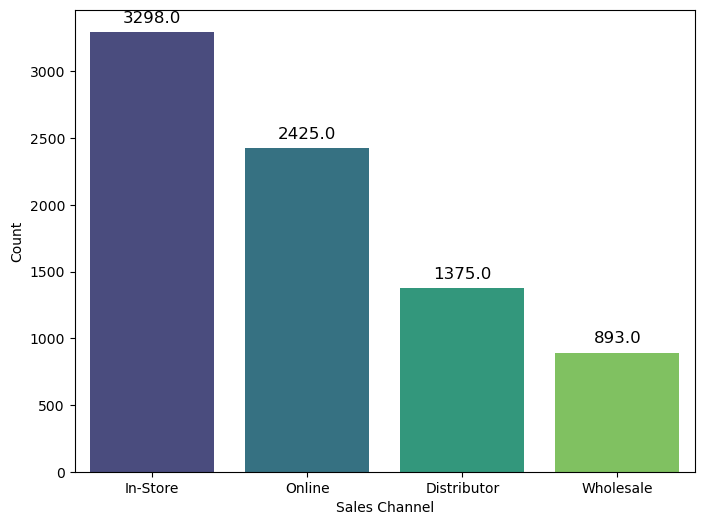

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sales channel', data=data, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()


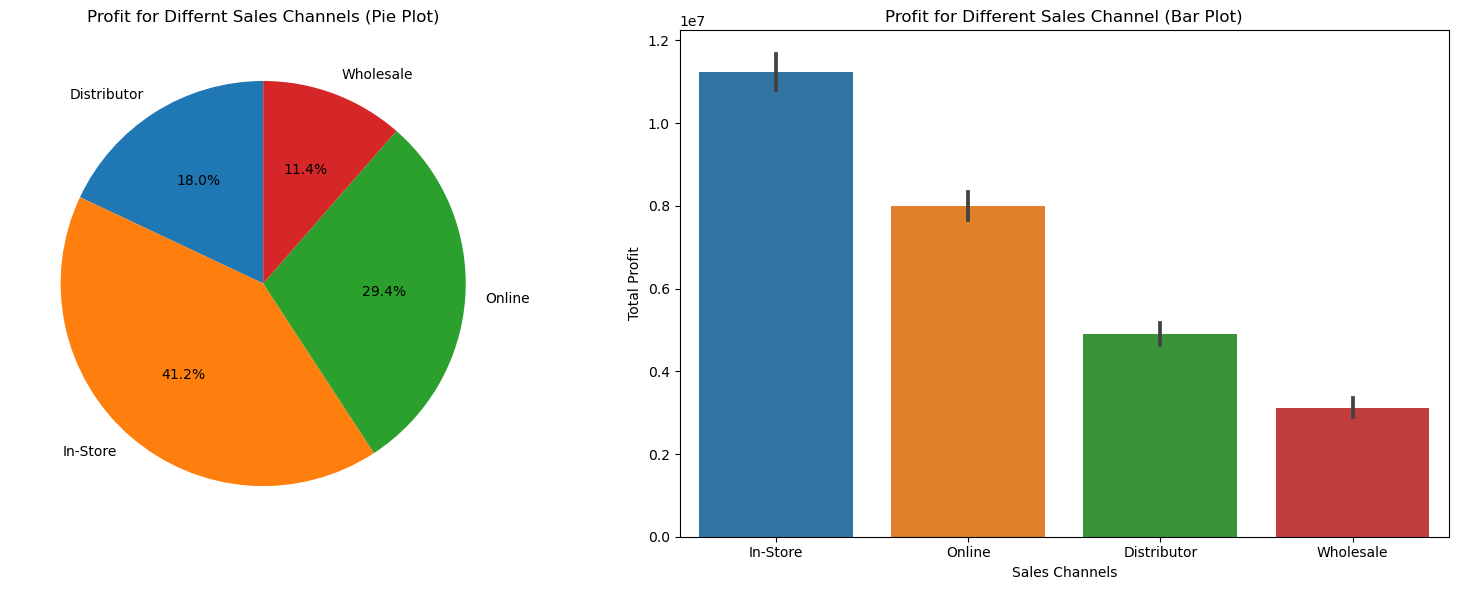

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

#plotting profit for Different sales Channels(Pie Plot)
data.groupby('sales channel')['profit'].sum().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title('Profit for Differnt Sales Channels (Pie Plot)')
axes[0].set_ylabel('')

#plotting profit for different sales channels(Bar Plot)
sns.barplot(x='sales channel', y='profit', data=data, estimator=sum, ax=axes[1])
axes[1].set_title('Profit for Different Sales Channel (Bar Plot)')
axes[1].set_xlabel('Sales Channels')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

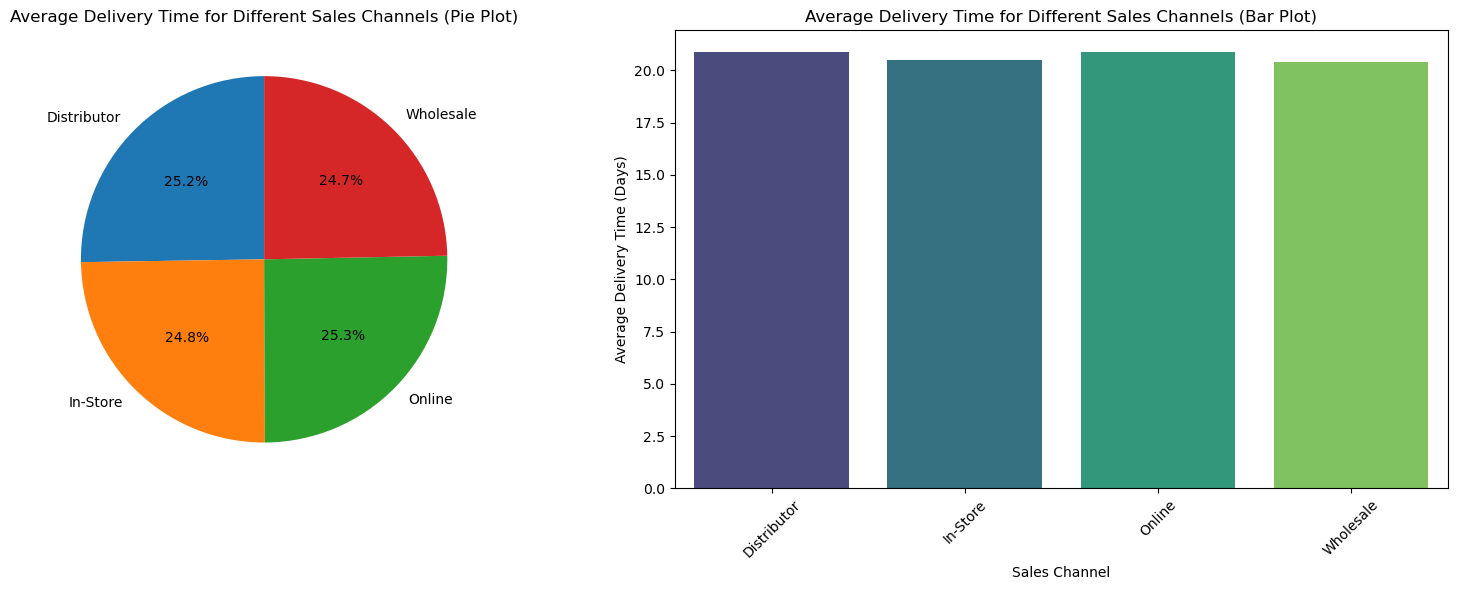

In [20]:
avg_delivery_time = data.groupby('sales channel')['deliverytime'].mean()
avg_delivery_time = avg_delivery_time.abs()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting Average Delivery Time for Different Sales Channels (Pie Plot)
avg_delivery_time.plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title('Average Delivery Time for Different Sales Channels (Pie Plot)')
axes[0].set_ylabel('')

# Plotting Average Delivery Time for Different Sales Channels (Bar Plot)
sns.barplot(x=avg_delivery_time.index, y=avg_delivery_time.values, palette='viridis', ax=axes[1])
axes[1].set_title('Average Delivery Time for Different Sales Channels (Bar Plot)')
axes[1].set_xlabel('Sales Channel')
axes[1].set_ylabel('Average Delivery Time (Days)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

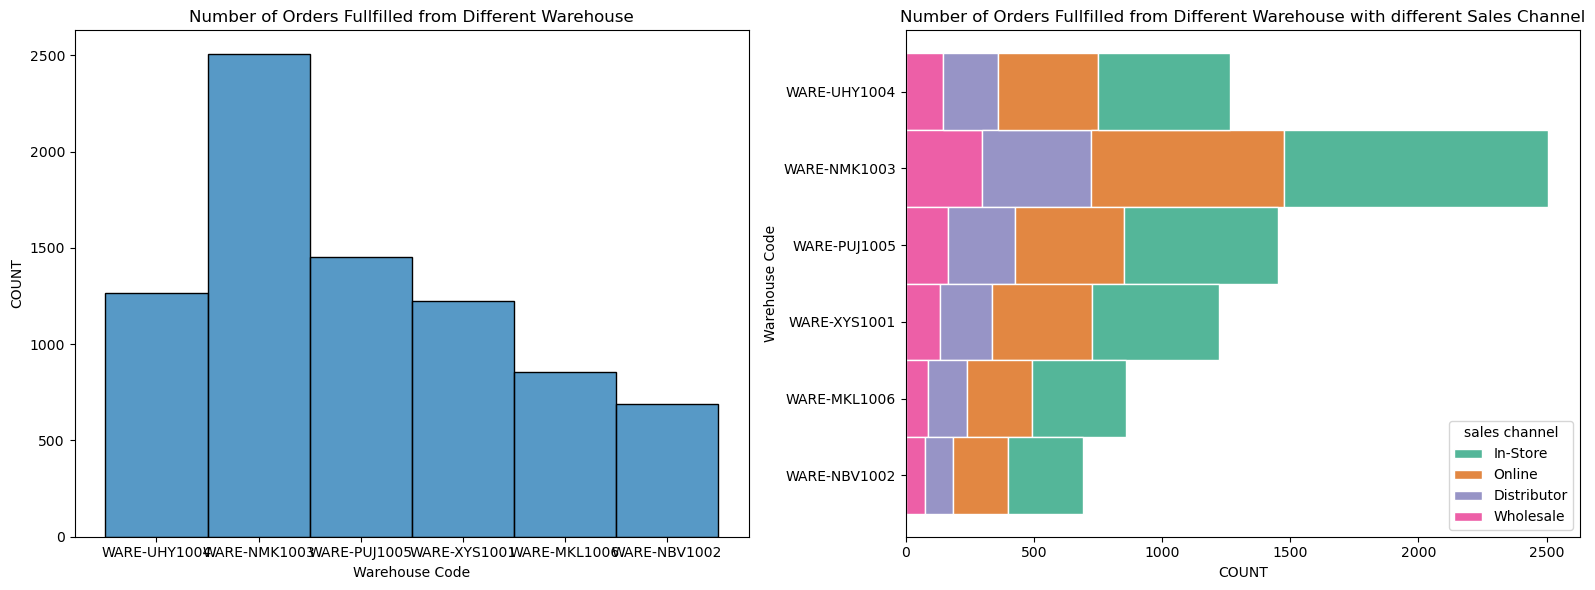

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

#Plotting Number of Orders Fullfilled from Different Warehoudse using Seaborn
sns.histplot(data=data, x='warehousecode', ax=axes[0])
axes[0].set_title('Number of Orders Fullfilled from Different Warehouse')
axes[0].set_xlabel('Warehouse Code')
axes[0].set_ylabel('COUNT')

#Plotting Number of Orders fullfilled  from Different Warehouse Using Seaborn (Stacked Bar Plot)
sns.histplot(data=data, y='warehousecode', hue='sales channel', multiple='stack', palette='Dark2', edgecolor='w', ax=axes[1])
axes[1].set_title('Number of Orders Fullfilled from Different Warehouse with different Sales Channel')
axes[1].set_xlabel('COUNT')
axes[1].set_ylabel('Warehouse Code')

plt.tight_layout()
plt.show()

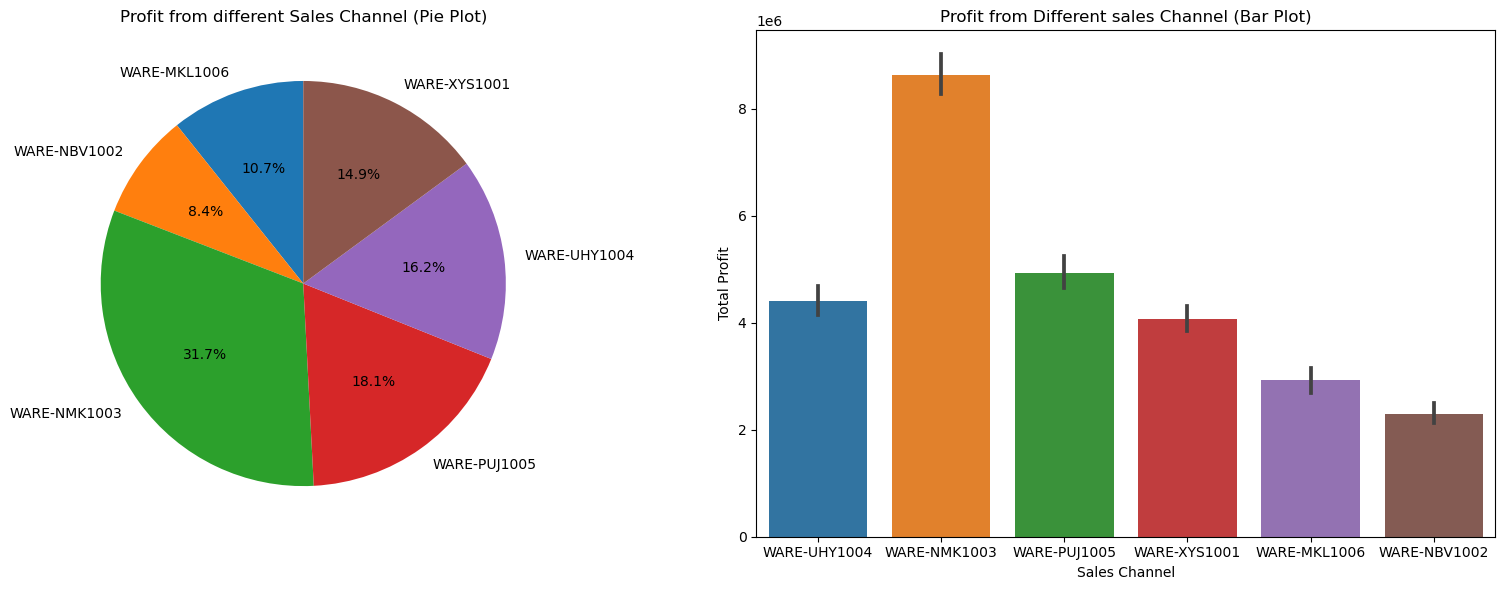

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

#Plotting Profit from different Sales Channel (Pie Plot)
data.groupby('warehousecode')['profit'].sum().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title('Profit from different Sales Channel (Pie Plot)')
axes[0].set_ylabel('')

#Plotting Profit from different Sales Channel (Bar Plot)
sns.barplot(x='warehousecode', y='profit', data=data, estimator=sum, ax=axes[1])
axes[1].set_title('Profit from Different sales Channel (Bar Plot)')
axes[1].set_xlabel('Sales Channel')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

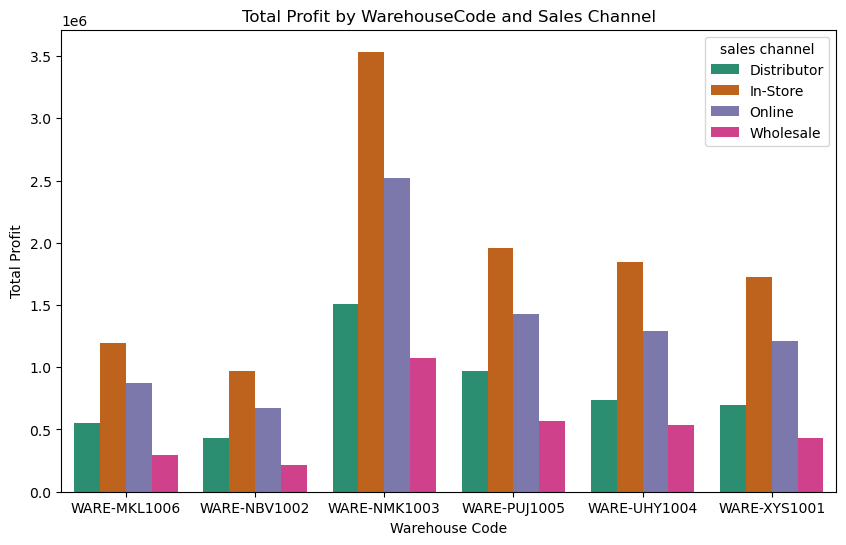

In [23]:
profit_by_category = data.groupby(['warehousecode', 'sales channel'])['profit'].sum().reset_index()

#Plotting total profit for each combiation using Seaborn (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='warehousecode', y='profit', hue='sales channel', data=profit_by_category, palette='Dark2')
plt.title('Total Profit by WarehouseCode and Sales Channel')
plt.xlabel('Warehouse Code')
plt.ylabel('Total Profit')
plt.show()

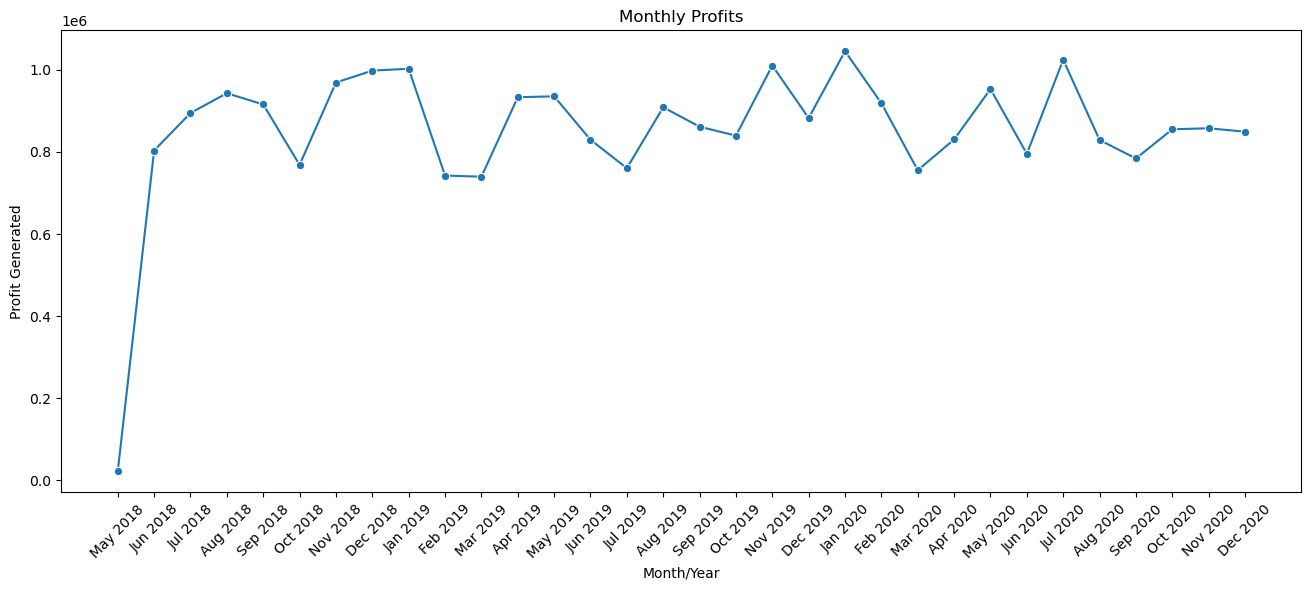

In [24]:
profit_by_month_year = data.groupby([data['orderdate'].dt.to_period('M')])['profit'].sum().reset_index()

#Plotting Profit generated per month for each month/year using Seaborn (Line plot)
plt.figure(figsize=(16, 6))
sns.lineplot(x=profit_by_month_year.index, y='profit', data=profit_by_month_year, marker='o')

#Format x-axis labels as "Jan 2018", "Feb 2018", etc.
plt.xticks(ticks=profit_by_month_year.index, labels=[date.strftime('%b %Y') for date in profit_by_month_year['orderdate']], rotation=45)
plt.title('Monthly Profits')
plt.xlabel('Month/Year')
plt.ylabel('Profit Generated')
plt.show()



In [25]:
profit_delivery_time = data.groupby('deliverytime')['profit'].sum().reset_index()
profit_delivery_time['deliverytime'] = profit_delivery_time['deliverytime'].abs()

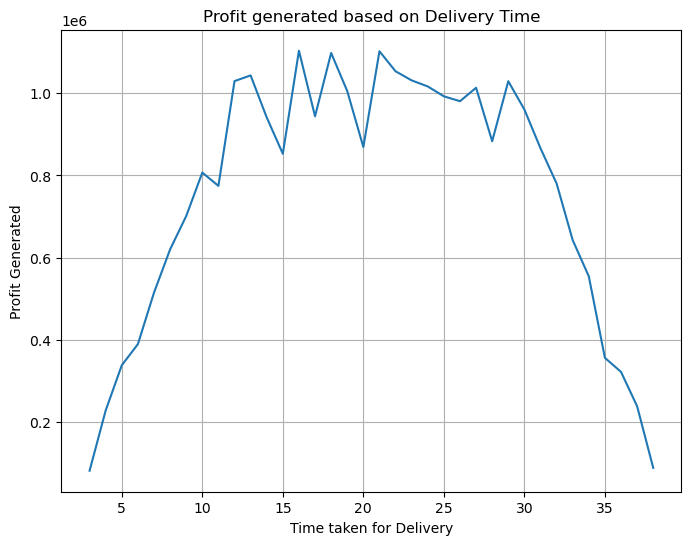

In [26]:
#Plotting Profit generated based on delivery time using Seaborn (Line Plot)
plt.figure(figsize=(8, 6))
sns.lineplot(x='deliverytime', y='profit', data=profit_delivery_time)
plt.title('Profit generated based on Delivery Time')
plt.xlabel('Time taken for Delivery')
plt.ylabel('Profit Generated')
plt.grid(True)
plt.show()

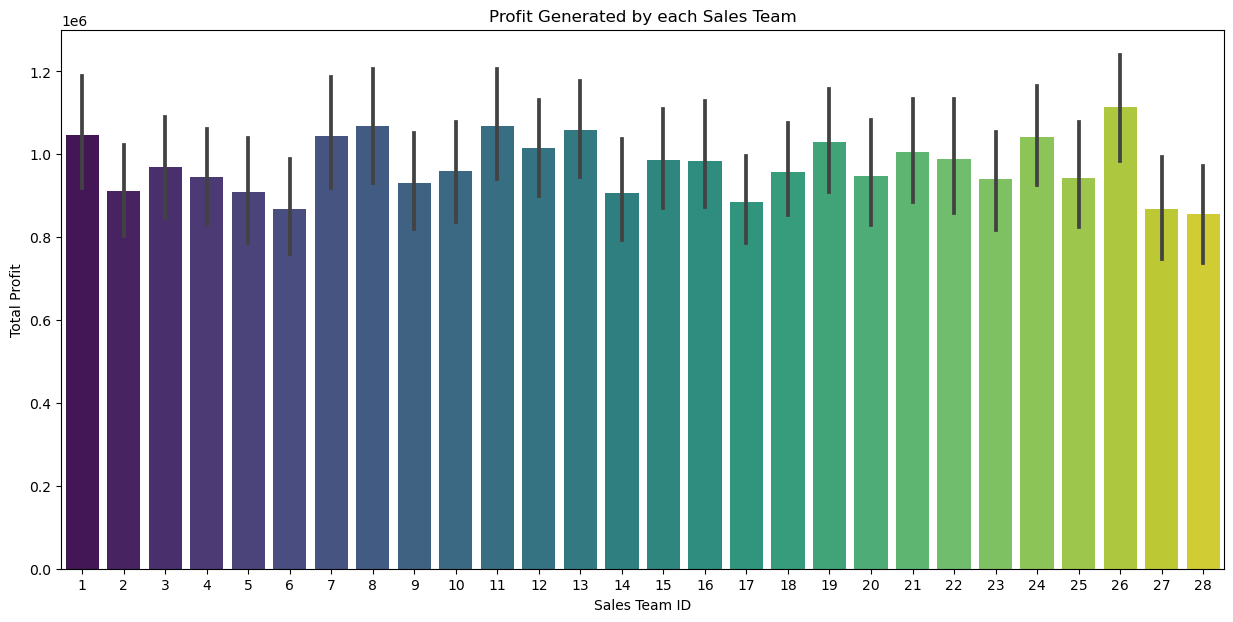

In [27]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(x='salesteamid', y='profit', data=data, estimator=sum, palette='viridis')
plt.title('Profit Generated by each Sales Team')
plt.xlabel('Sales Team ID')
plt.ylabel('Total Profit')
plt.show()

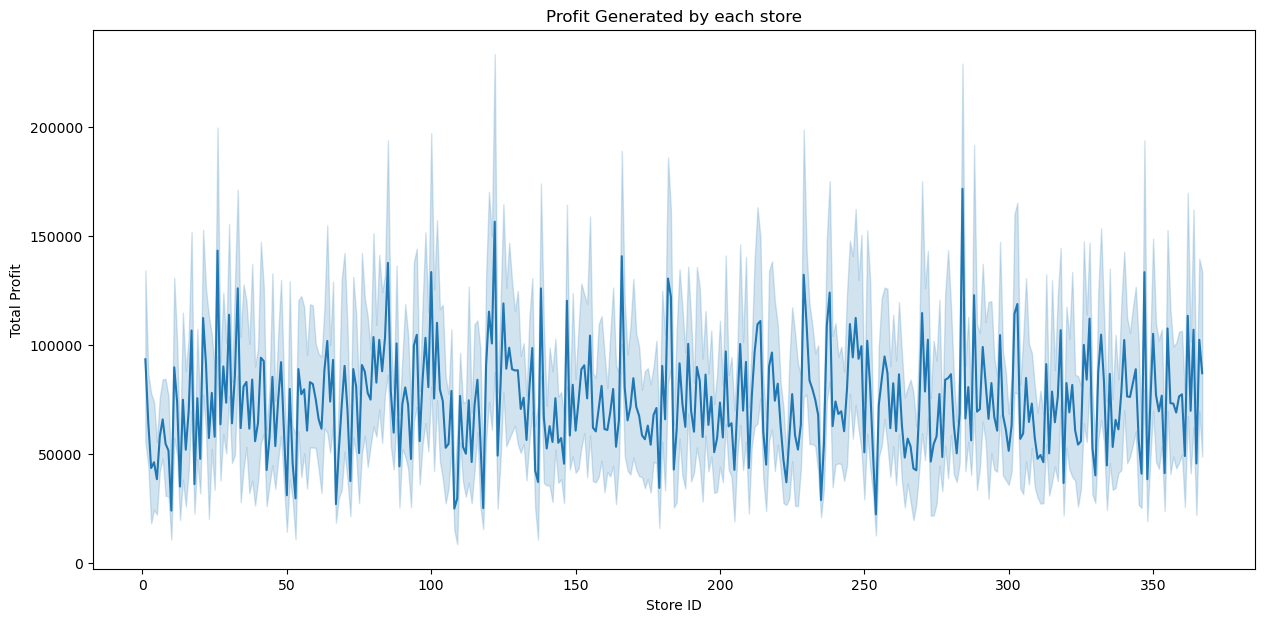

In [28]:
plt.figure(figsize=(15, 7))
ax=sns.lineplot(x='storeid', y='profit', data=data, estimator=sum)
plt.title('Profit Generated by each store')
plt.xlabel('Store ID')
plt.ylabel('Total Profit')
plt.show()

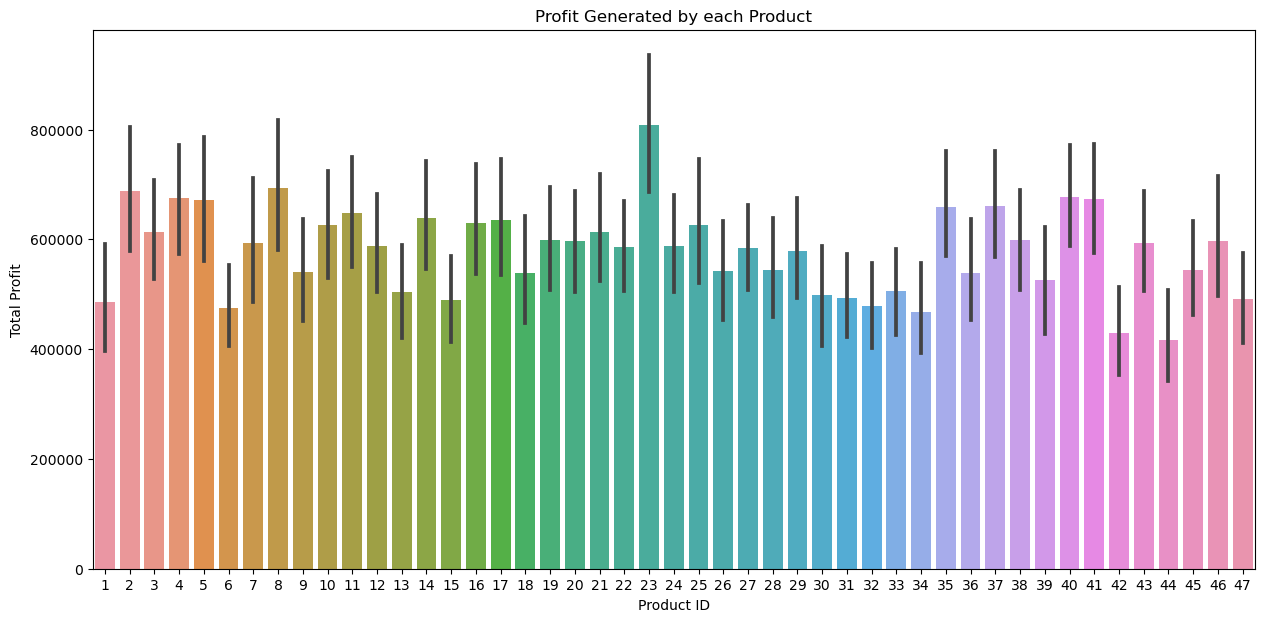

In [29]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='productid', y='profit', data=data, estimator=sum)
plt.title('Profit Generated by each Product')
plt.xlabel('Product ID')
plt.ylabel('Total Profit')
plt.show()

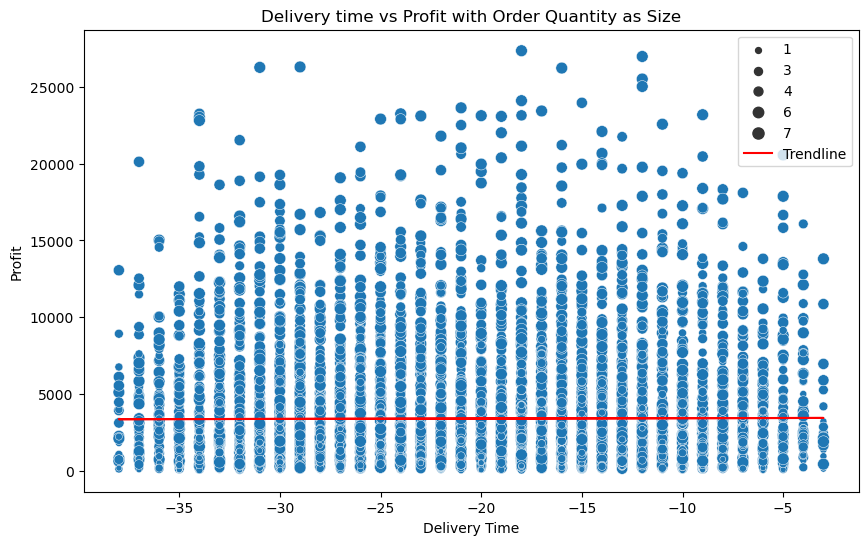

In [30]:
coefficients = np.polyfit(data['deliverytime'], data['profit'], 1)
trendline = np.polyval(coefficients, data['deliverytime'])

#Plotting deliverytime vs profit with order quantity as size using Seaborn (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='deliverytime', y='profit', size='order quantity', data=data)
plt.plot(data['deliverytime'], trendline, color='red', label='Trendline')
plt.title('Delivery time vs Profit with Order Quantity as Size')
plt.xlabel('Delivery Time')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [31]:
data = data.drop(['ordernumber', 'procureddate', 'orderdate', 'shipdate', 'deliverydate', 'currencycode'], axis=1)

In [32]:
data.head()

,sales channel,warehousecode,salesteamid,customerid,storeid,productid,order quantity,discount applied,unit cost,unit price,deliverytime,profit
0,In-Store,WARE-UHY1004,6,15,259,12,5,0.08,1001.18,1963.1,-19,4424.83
1,Online,WARE-NMK1003,14,20,196,27,3,0.08,3348.66,3939.6,-32,1630.99
2,Distributor,WARE-UHY1004,21,16,213,16,1,0.05,781.22,1775.5,-31,944.57
3,Wholesale,WARE-NMK1003,28,48,107,23,8,0.08,1464.69,2324.9,-7,6331.15
4,Distributor,WARE-NMK1003,22,49,111,26,8,0.10,1476.14,1822.4,-26,2493.07


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sales channel     7991 non-null   object 
 1   warehousecode     7991 non-null   object 
 2   salesteamid       7991 non-null   int64  
 3   customerid        7991 non-null   int64  
 4   storeid           7991 non-null   int64  
 5   productid         7991 non-null   int64  
 6   order quantity    7991 non-null   int64  
 7   discount applied  7991 non-null   float64
 8   unit cost         7991 non-null   float64
 9   unit price        7991 non-null   float64
 10  deliverytime      7991 non-null   int64  
 11  profit            7991 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 749.3+ KB


In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['sales channel'] = le.fit_transform(data['sales channel'])
data['warehousecode'] = le.fit_transform(data['warehousecode'])

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['profit']] = scaler.fit_transform(data[['profit']])
data[['unit cost']] = scaler.fit_transform(data[['unit cost']])
data[['unit price']] = scaler.fit_transform(data[['unit price']])
data.head()

,sales channel,warehousecode,salesteamid,customerid,storeid,productid,order quantity,discount applied,unit cost,unit price,deliverytime,profit
0,1,4,6,15,259,12,5,0.08,-0.387229,-0.192133,-19,0.272637
1,2,2,14,20,196,27,3,0.08,1.723162,0.989284,-32,-0.478134
2,0,4,21,16,213,16,1,0.05,-0.584974,-0.304267,-31,-0.662591
3,3,2,28,48,107,23,8,0.08,0.029468,0.024127,-7,0.784909
4,0,2,22,49,111,26,8,0.10,0.039762,-0.276234,-26,-0.246473


In [36]:
from sklearn.model_selection import train_test_split

X = data.drop(['profit'], axis = 1)
y = data['profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state = 42)

In [37]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7191, 11)
Shape of X_test: (800, 11)
Shape of y_train: (7191,)
Shape of y_test: (800,)


In [40]:
!pip install lightgbm
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor, Dataset

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 653.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 871.5 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 950.9 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/

In [41]:
lgb_params = {
    'n_jobs': -1,
    'random_state': 123
}

#Create and train the LGBMRegressor
lgb_model = LGBMRegressor(**lgb_params)

#Train the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 7191, number of used features: 11
[LightGBM] [Info] Start training from score 0.000265


LGBMRegressor(n_jobs=-1, random_state=123)

In [42]:
y_pred = lgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R2 score: {r2}")

R2 score: 0.9944052532120707


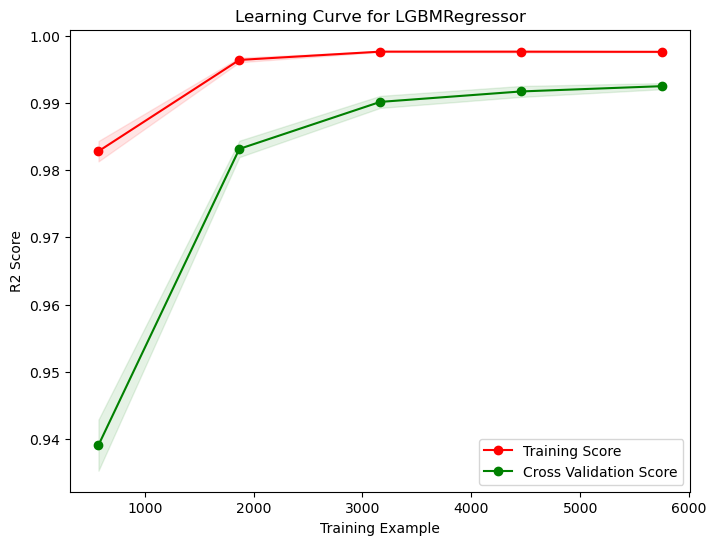

In [46]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
  lgb_model, X_train, y_train, cv=5, scoring='r2', n_jobs= -1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross Validation Score")
plt.xlabel("Training Example")
plt.ylabel("R2 Score")
plt.legend(loc="best")
plt.title("Learning Curve for LGBMRegressor")
plt.show()

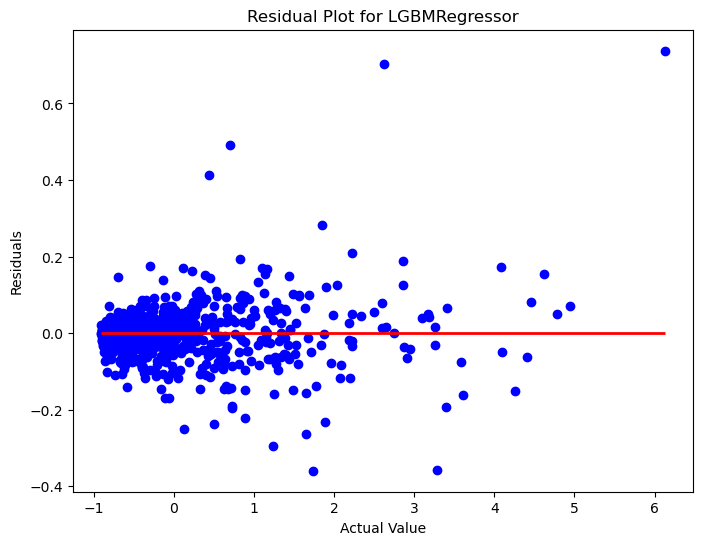

In [47]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red', linewidth=2)
plt.xlabel('Actual Value')
plt.ylabel('Residuals')
plt.title('Residual Plot for LGBMRegressor')
plt.show()
